# Exploration of personal data

This notebook explores data on my personal mood across time and locations. The goal is to check if any interesting correlations can be observed between moods, activities, locations, and time periods. 


### Data sources
The data has been collected using two forms:

**Daily form**. The form has been filled in daily since October 2018. It collected information on daily mood ratings, sleep, medication, and served as a log of important habits (e.g. meditation) or activities. Not all questions in the form were in it from the start, so some columns will have NaN values.

**Weekly Form**. The form has been filled on a weekly basis since January 2019. It collected more qualitative data—for example: reflections from the week, interesting resources, best quotes, things I'm grateful for, as well as location (country & city). It also served as a log of time spent on various activites, most importantly:
1. work (defined as: paid activities)
2. self-development (for e.g. reading, taking online courses, learning & practising data analysis, etc.)
3. life-organising (for e.g. answering non-work emails, booking travel, sending invoices, or filling in the forms above etc.)
4. sleep (avg deep sleep time perweek, avg total sleep time per week)

### Tracking methods 
Time for points 1-3 were tracked manually using a time tracking browser extension [Toggl](http://toggl.com/) and exported at the end of every Sunday. 

A pdf report summarizing the stats from the last 7 days can be generated using a script  . I didn't use this for logging—it doesn't make the process more efficient than just opening the website and clicking the reporttab, but it's nice this is possible.

Sleep data was tracked with an Oura ring & logged in on Sunday.

### Accessing data
Airtable. The data is stored in Airtable and can be accessed using an API. The attached Python scripts, `export_life_tracking.py`, and `export_weekly_tracking.py`, will import the latest data from the Airtable.  


## Questions
Since October 2018 I've lived in 7 countries, had ~1 week visits in further 2. It would be interesig to see how my mood stats, work habits, and sleep varied accross locations. 

Other questions:
* Are there any correlations between different moods? Or moods and sleep quality?
* Are there correlations between time spent on work or self-development and mood?
* What can text analysis tell me about my activities, and what I'm grateful for?

**Note** Some data will be skipped in this analysis due to its personal nature. 

# Analysis

### Initial exploration of the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from datetime import date

In [2]:
today = date.today()
today_string = today.strftime('%d-%m-%Y')

In [3]:
# read files into a dataframe
# if the data export was done on the same day, the below will read it in
# df = pd.read_csv('/Users/martakrzeminska/Dataprojects/LifeTrackingData/Life-tracking{}.csv'.format(today_string), parse_dates =["Date"], index_col ="Date")
# df_weekly = pd.read_csv('/Users/martakrzeminska/Dataprojects/LifeTrackingData/Weekly-tracking{}.csv'.format(today_string), parse_dates =["Week end"], index_col ="Week end")

#if the data import was done on another day use this with the correct filename
# read in and reindex with date as an index col
df = pd.read_csv('Life-tracking09-08-2020.csv', parse_dates =["Date"], index_col ="Date")

df_weekly = pd.read_csv('/Users/martakrzeminska/Dataprojects/LifeTrackingData/Weekly-tracking09-08-2020.csv', parse_dates =["Week end"], index_col ="Week end")

In [4]:
print('Thre are', df_weekly.shape[0], 'rows in the weekly dataframe, that is, data from', df_weekly.shape[0], 'weeks.' )

Thre are 82 rows in the weekly dataframe, that is, data from 82 weeks.


In [5]:
print('Thre are', df.shape[0], 'rows in the weekly dataframe, that is, data from', df.shape[0], 'days.' )

Thre are 648 rows in the weekly dataframe, that is, data from 648 days.


### Daily data

In [6]:
print('The dataframe has', df.shape[0], 'rows. Which means it logs data from the last', df.shape[0], 'days.')

print('The columns are:', df.columns)

The dataframe has 648 rows. Which means it logs data from the last 648 days.
The columns are: Index(['Unnamed: 0', 'Got up at', 'Sleep Quality', 'Sleep Aids (previous day)',
       'Meditation', 'Meditation time', 'Yoga', 'Yoga time (min)', 'Anxiety',
       'Depression', 'Productivity', 'Self-confidence', 'Motivation',
       'Creativity', 'Vit B12 (in ug)', 'Vit d (in IU)', 'Other?',
       'Reviewed flashcards?', 'Gym', 'People interacted with (number)',
       'Quality of people's interaction', 'Amount of alcohol (ml)',
       'Amount of coffee (cups)', 'Period', 'Scalp state', 'Psoriasis on body',
       'What are 3 stand out things that happened today?', 'Sex'],
      dtype='object')


In [7]:
#drop a useless column
df = df.drop('Unnamed: 0', 1)

In [8]:
#sort the df 
df_sorted = df.sort_values(by='Date', ascending=False)
df_sorted.head(2)

,Got up at,Sleep Quality,Sleep Aids (previous day),Meditation,Meditation time,Yoga,Yoga time (min),Anxiety,Depression,Productivity,...,Gym,People interacted with (number),Quality of people's interaction,Amount of alcohol (ml),Amount of coffee (cups),Period,Scalp state,Psoriasis on body,What are 3 stand out things that happened today?,Sex
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-09,21600,8.0,"['Melatonin 1mg', 'Diazepam 1mg']",Yes,10,Yes,5,3,2.0,5,...,['Chloe Booty Challenge'],1,5,0.0,2.0,Yes,3,4,1/ Zug abfahren zum Frankfurt und nach Wien. 2...,No
2020-08-08,23400,7.0,['Melatonin 1mg'],Yes,10,Yes,2,2,3.0,4,...,['Chloe Booty Challenge'],1,8,0.0,0.5,Yes,3,3,1/ Last full day in Paris. 2/ Placed clues for...,No


In [9]:
# if using data exported on the same day, can use 'today' as a variable
# convert today to the same format as data in the df
# today_64 = np.datetime64(today)

# # get stats for last 30 days
# last_month = df_sorted[df_sorted['Date'] >= (today_64 - pd.Timedelta(days=32))]
# last_month.shape

In [10]:
# if using data exported on a different day
last_month = df_sorted[df_sorted.index >= (df_sorted.index[0]- pd.Timedelta(days=29))]
last_month.shape

(30, 27)

### Get basic stats

In [11]:
# check column types
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 648 entries, 2020-08-09 to 2018-10-16
Data columns (total 27 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Got up at                                         648 non-null    int64  
 1   Sleep Quality                                     646 non-null    float64
 2   Sleep Aids (previous day)                         560 non-null    object 
 3   Meditation                                        648 non-null    object 
 4   Meditation time                                   648 non-null    int64  
 5   Yoga                                              647 non-null    object 
 6   Yoga time (min)                                   648 non-null    int64  
 7   Anxiety                                           648 non-null    int64  
 8   Depression                                        647 non-null    float64
 9   Pr

Since I've constructed the survey I know what metrics were used:
* Measured on a 1-10 scale: 'Anxiety','Depression', 'Productivity', 'Self-confidence', 'Motivation','Creativity', 'Sleep Quality','Quality of people's interaction', 'Scalp state', 'Psoriasis on body'.
* Boolean (yes/no quesitons): 'Reviewed flashcards?', 'Yoga', 'Meditation', 'Sex', 'Period'
* Duration (in min) : 'Yoga time (min)', 'Meditation time'
* Labels (selection from existing options, not always very precise tbf): 'Sleep Aids (previous day)', 'Other?' (refers to other medication or vitamins), 'Gym'
* Others, in specified units: 'Vit B12 (in ug)', 'Vit d (in IU)', 'People interacted with (number)', 'Amount of alcohol (ml)', 'Amount of coffee (cups)'
* Text column: 'What are 3 stand out things that happened today?'

#### Handling missing values

In [12]:
df_sorted.isna().sum()

Got up at                                             0
Sleep Quality                                         2
Sleep Aids (previous day)                            88
Meditation                                            0
Meditation time                                       0
Yoga                                                  1
Yoga time (min)                                       0
Anxiety                                               0
Depression                                            1
Productivity                                          0
Self-confidence                                       1
Motivation                                            1
Creativity                                            2
Vit B12 (in ug)                                       0
Vit d (in IU)                                        90
Other?                                                1
Reviewed flashcards?                                 78
Gym                                             

As mentioned before, not all columns were present in the form from the start. 

Clearly, 'What are 3 stand out things that happened today', 'Sleep Aids (previous day)', 'Vit d (in IU)', 'Reviewed flashcards?', and 'Sex', were added at a much later date. But, since none of these are important for our analysis there is no need to fill them in.

For the remaining columns which have a few values missing we can fill in with the mean or most common values.

In [13]:
f = ((0<df_sorted.isna().sum()) & (df_sorted.isna().sum()<10))
f[f==True]

Sleep Quality             True
Yoga                      True
Depression                True
Self-confidence           True
Motivation                True
Creativity                True
Other?                    True
Amount of alcohol (ml)    True
Period                    True
dtype: bool

Some of the values will be deliberately removed from the later analysis (Sex, Period, Scalp state and Psoriasis on body).

In [14]:
# function to get stats for the boolean variables from a specified number of days
def get_bool_stats(number_of_days):
    filtered_by_date = df_sorted[df_sorted.index >= (df_sorted.index[0] - pd.Timedelta(days=number_of_days-1))]
    yes_no_cols = ['Reviewed flashcards?', 'Meditation', 'Yoga']
    for each in yes_no_cols:
        #convert yes/no to 1/0
        as_bool = filtered_by_date[each].astype(str).str.lower().replace(('yes', 'no'), (1, 0))
        counts = as_bool.value_counts()
        #print counts and percentages
        print('Times', str.lower(each), 'happened:', counts[1], 'times. Percentage of days:', round(counts[1]/len(filtered_by_date)*100,2), "%")

get_bool_stats(30)

Times reviewed flashcards? happened: 30 times. Percentage of days: 100.0 %
Times meditation happened: 29 times. Percentage of days: 96.67 %
Times yoga happened: 29 times. Percentage of days: 96.67 %


In [15]:
# function to get stats for the mood from a specified number of days

def get_feeling_stats(number_of_days):
    filtered_by_date = df_sorted[df_sorted.index >= (df_sorted.index[0] - pd.Timedelta(days=number_of_days-1))]
    cols_mean = ['Anxiety', 'Depression', 'Productivity', 'Self-confidence', 'Motivation','Creativity', 'Sleep Quality', 'People interacted with (number)', 'Quality of people\'s interaction']
    for each in cols_mean:
        mean = filtered_by_date[each].mean()
        print('Mean of', str.lower(each), 'in the last', number_of_days, 'days is:', round(mean,2))

In [16]:
get_feeling_stats(30)

Mean of anxiety in the last 30 days is: 2.33
Mean of depression in the last 30 days is: 2.43
Mean of productivity in the last 30 days is: 5.33
Mean of self-confidence in the last 30 days is: 5.34
Mean of motivation in the last 30 days is: 4.79
Mean of creativity in the last 30 days is: 1.97
Mean of sleep quality in the last 30 days is: 7.6
Mean of people interacted with (number) in the last 30 days is: 3.03
Mean of quality of people's interaction in the last 30 days is: 8.03


# Plotting mood data

To get a picture the mood data from the last month in a more visual way we can plot it.

In [17]:
import datetime as dt
import matplotlib.dates as mdates

We can create a funciton to plot any choosen feelings for a selected number of days.

In [18]:
def plot_mood(mood_label_1, mood_label_2, number_of_days):
    sns.set()
    fig, ax = plt.subplots(figsize=(16,10))
    
    #filter dataframe to select required timespan
    filtered_by_date = df_sorted[df_sorted.index >= (df_sorted.index[0] - pd.Timedelta(days=number_of_days-1))]
    
    #set x and y axess
    x = filtered_by_date.index
    y = filtered_by_date[mood_label_1]
    y1 = filtered_by_date[mood_label_2]
    
    #format title
    title = f"{mood_label_1} and {str.lower(mood_label_2)} in the lass {number_of_days} days"
    
    #set title and labels
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Levels') 
    ax.set_xlabel('Date')

    #format date labels
#     ax.set_xticks(np.arange(len(x))) 
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gcf().autofmt_xdate()
    ax.tick_params(axis='x', rotation=45)

    ax.plot(x, y, marker='.', label=mood_label_1)
    ax.plot(x, y1, marker='x', label=mood_label_2)

    #set legend
    plt.legend()

    plt.show()

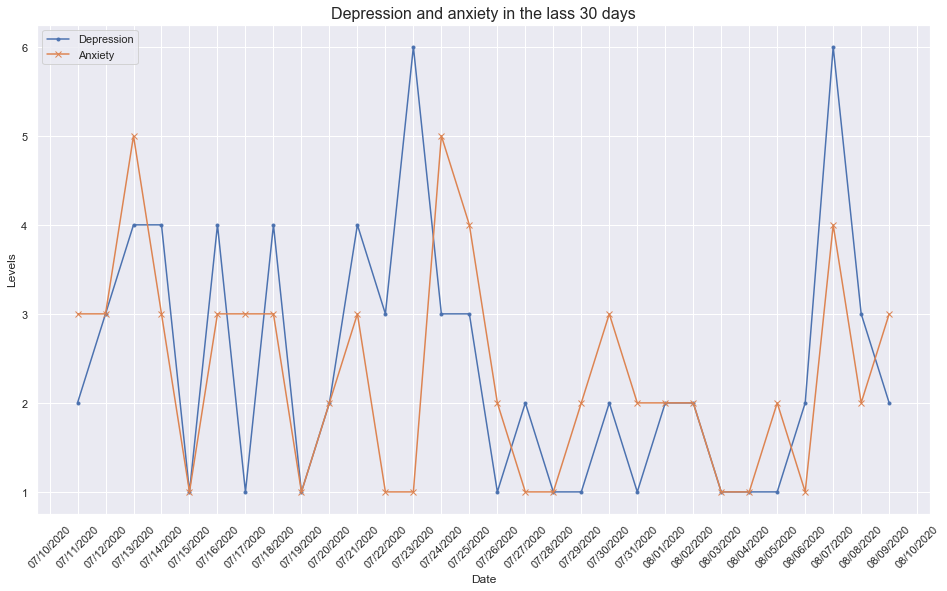

In [19]:
#plot depression and anxiety in the last month
plot_mood('Depression','Anxiety', 30)

Depression and anxiety seem positively correlated. In terms of last 30 days we can see spikes in both Depression and Anxiety on the 15th, 23rd and 30th of June, and dips on the 17th, 21st of June, 6th and 7th of July. 

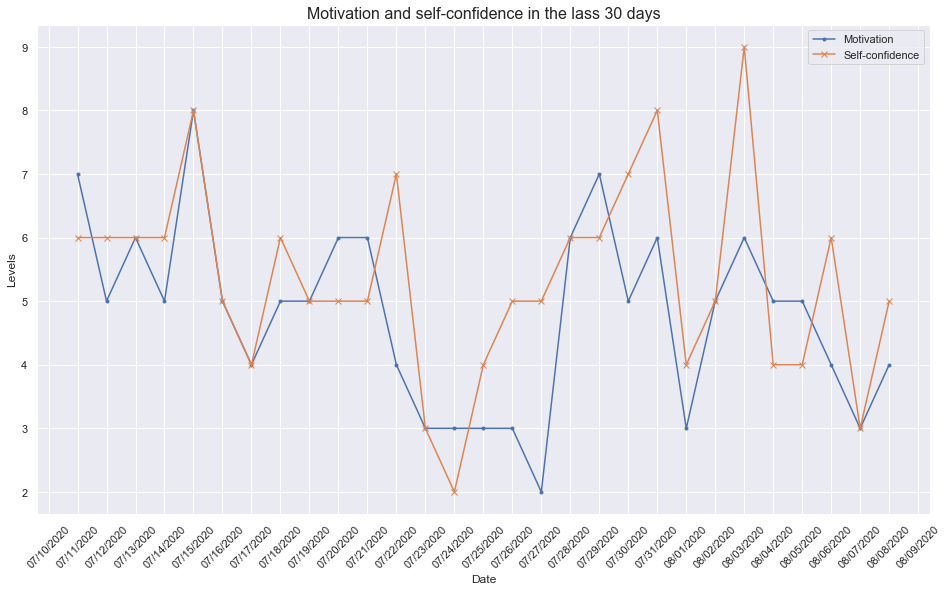

In [20]:
#plot motivation & self-confidence in the last month
plot_mood('Motivation','Self-confidence', 30)

Motivation and self-confidence seem positively correlated. In terms of last 30 days we can see spikes in both on the 17th, 21st of June, and 6th and 7th of July. Dips on the 15th, 18th, and 27th of June.

Notice that these are the reverse results of the Depression and Anxiety scores. that is, when there was a dip in Anxiety/Depresstion there is often a spike in Motivation/Self-Confidence.

## Correlations for the full dataset to date

Beyond just eyeballing the data we can check if there are correlations between different variables. To do that we will calculate the Pearson correlation coefficient & plot a matrix to visualise the spread of correlation values. 

We will use data from the whole dataset.

In [21]:
# columns with numerical values for correlation
cols_for_correl = ['Anxiety', 'Depression', 'Productivity', 'Self-confidence', 'Motivation','Creativity', 'Sleep Quality', 'Quality of people\'s interaction']
df_correl = df_sorted[cols_for_correl]
#drop nans
df_correl_clean = df_correl.dropna()

In [22]:
#compute correlation matrix
corr = df_correl_clean.corr()

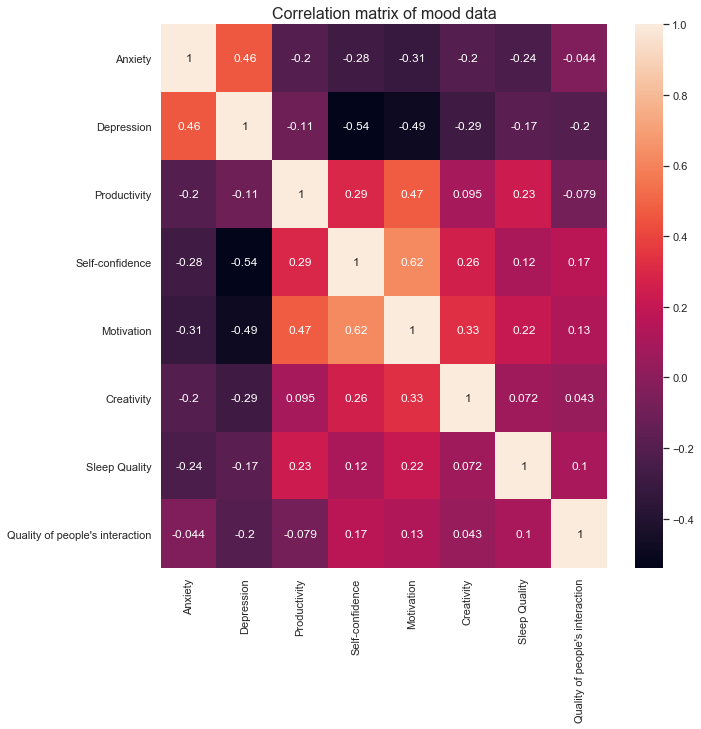

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
_ = sns.heatmap(corr, annot = True, ax=ax)
plt.title("Correlation matrix of mood data", fontsize=16)
plt.show()

**Intrerpretation**. 

To interpret we'll follow standard benchmarks where typically:
* values over 0.3 or under -0.3 are considered weak correlations
* values over 0.5 or under -0.5 are considered medium correlations
* values over 0.7 or under -0.7 are considered strong correlations

There are no strong correlations in the data set, the strongest are in the medium range. 

In [24]:
#pairs of corrlations sorted by value
corr_pairs = corr.unstack().sort_values(kind="quicksort")

#get negative pairs with correl stronger than -0.5
negative_pairs = corr_pairs[corr_pairs < -0.5]
print('Across the whole dataset there is a strong negative correlation between the following pairs of variables:', '\n', negative_pairs)

Across the whole dataset there is a strong negative correlation between the following pairs of variables: 
 Self-confidence  Depression        -0.539509
Depression       Self-confidence   -0.539509
dtype: float64


In [25]:
positive_pairs = corr_pairs[(corr_pairs > 0.5) & (corr_pairs <1)]
print('Across the whole dataset there is a strong positive correlation between the following pairs of variables:', '\n', positive_pairs)

Across the whole dataset there is a strong positive correlation between the following pairs of variables: 
 Self-confidence  Motivation         0.624955
Motivation       Self-confidence    0.624955
dtype: float64


In [26]:
#function to show strongest correlations for selected number of previous days
def strongest_corr_in_n_days(n_days):
    filtered_by_date = df_sorted[df_sorted.index >= (df_sorted.index[0] - pd.Timedelta(days=n_days-1))]
    cols_for_correl = ['Anxiety', 'Depression', 'Productivity', 'Self-confidence', 'Motivation','Creativity', 'Sleep Quality', 'People interacted with (number)', 'Quality of people\'s interaction']
    df_correl = filtered_by_date[cols_for_correl]
    df_correl = df_correl.dropna()
    #correlation matrix
    corr = df_correl_clean.corr()
    #create pairs & sort the matrix
    corr_pairs = corr.unstack().sort_values(kind="quicksort")
    # filter the results
    strong_negative_pairs = corr_pairs[(corr_pairs < -0.5) & (corr_pairs > -1)]
    strong_positive_pairs = corr_pairs[(corr_pairs > 0.5) & (corr_pairs < 1)]
    
    #print results
    print('There is a strong negative correlation between:', '\n', strong_negative_pairs)
    print('There is a strong positive correlation between:', '\n', strong_positive_pairs)

In [27]:
strongest_corr_in_n_days(30)

There is a strong negative correlation between: 
 Self-confidence  Depression        -0.539509
Depression       Self-confidence   -0.539509
dtype: float64
There is a strong positive correlation between: 
 Self-confidence  Motivation         0.624955
Motivation       Self-confidence    0.624955
dtype: float64


## Analyzing text data with NLP

The column `What are 3 stand out things that happened today?` captured three main activities or events from each day. We can analyse the text with NLP to see what trends we can find: 
* what do I do most days? 
* Who do I spend time with? 
* What are the most unique activities I've done in a time period? 

In [28]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [29]:
df_sorted= df_sorted.rename(columns={'What are 3 stand out things that happened today?':'three_things'})

In [30]:
#drop nans for analysis
no_nan_three_things = df_sorted['three_things'].dropna()

In [31]:
#prepare text for analysis, clean the text column, and turn it into a list of sentence strings
import re

text = []

for row in no_nan_three_things.astype(str):
    row = row.replace('1/','').replace('2/','').replace('3/','').replace('\\','')
    #remove punctuation
    row = re.sub(r'[^\w\s]','', row)
    row = row.lower().strip()                                                    
    text.append(row)

In [32]:
#remove stopwords from each sentence
stop_words = set(stopwords.words('english'))
sentences_tokenized = [word_tokenize(sentence) for sentence in text]

#create a list of sentences without stopwords
filtered_sentences = [[w for w in s if not w in stop_words] for s in sentences_tokenized]

In [33]:
#create a string with stopwords
text_string = ' '.join(text)

#create string without stopwords
text_string_filtered = [' '.join(word) for word in filtered_sentences]
text_string_filtered = ''.join(text_string_filtered)

In [34]:
#create word cloud from the text string
from wordcloud import WordCloud

#generate word cloud with max 50 words
cloud = WordCloud(max_words=50).generate(text_string_filtered)

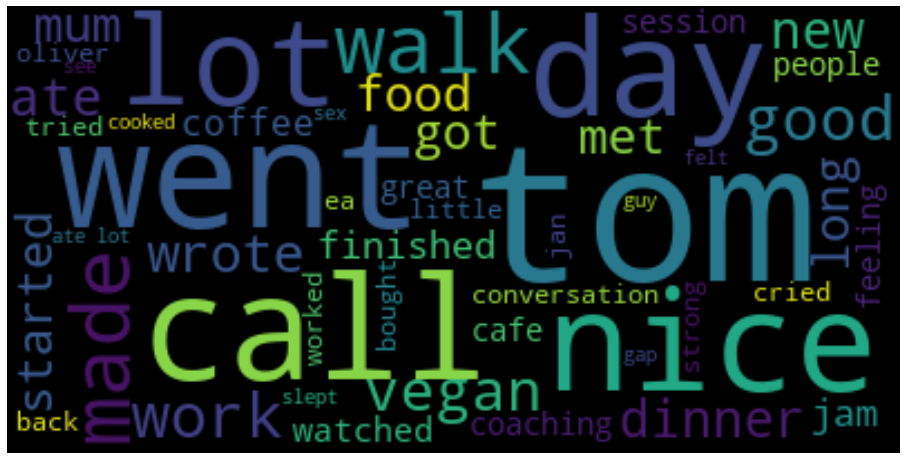

In [35]:
#plot the word cloud
fig = plt.figure(figsize=(16,10))
_ = plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Interpretation**
For context, Tom is my partner so it makes sense he appears most of the time. In fact, it would be pretty worryng if he didn't :P Having a "nice day" is a stand out event, as well as going places (went, walk), or having calls.

We can further refine the list using CountVectorizer and extract from the text words with specified frequency. 

In [36]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

#get top 50 most frequent words ignoring stopwords and those that appear less than 30 times 
vect = CountVectorizer(max_features=50, stop_words='english', min_df = 30)
vect.fit(no_nan_three_things)

X = vect.transform(no_nan_three_things)
vect.get_feature_names()

## in case you need a df of this
# X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())

['ate',
 'day',
 'dinner',
 'food',
 'good',
 'got',
 'jam',
 'lot',
 'met',
 'new',
 'nice',
 'started',
 'tom',
 'vegan',
 'walk',
 'went',
 'work',
 'wrote']

## Anlysis of gratefulness based on weekly data 

The weekly data form captured three things I was grateful for each week. It would be interesting to see is there are any repeating patterns here.

In [37]:
#print columsn to identify which one we need
df_weekly.columns

Index(['Unnamed: 0', 'Which city were you in most of this week?', 'Country',
       'What the main lesson of this week?',
       'What's a quote you want to remember?',
       'What three things were you grateful for?',
       'What new things were you learning this week (courses, anki decks, clearer thinking, concepts)',
       'What's the best text (video, talk, etc.) you came across? One that you'd reread or recommend to others.',
       'Did you do anything creative?', 'If yes, what?',
       'Did you get out of your comfort zone this week?',
       'Did you do anything out of ordinary this week?',
       '*Self Questioning.* What assumption did you question, what did you change your mind about?',
       'How many hours have you worked for money? (Toggle data)',
       'How many hours have you spent on self improvement & career development? (Toggl data)',
       'How many hours were taken by life-organizing?',
       'How many times have you been to the gym?',
       'How many time

In [38]:
gratefulness = df_weekly['What three things were you grateful for?']

In [39]:
#create a list of sentences from the column
grateful_text = []

#clean the strings and append to the list
for row in gratefulness.astype(str):
    row = row.replace("1/",'').replace("2/", '').replace('3/','')
    #remove punctuation
    row = re.sub(r'[^\w\s]','', row)
    row = row.lower().strip()                                                    
    grateful_text.append(row)

In [40]:
#tokenize sentences & remove stopwords
sent_grateful_tokenized = [word_tokenize(sentence) for sentence in grateful_text]
filtered_grateful_sentences = [[w for w in s if not w in stop_words] for s in sent_grateful_tokenized]

In [41]:
#join senteces into one long string
grateful_string_filtered = [' '.join(word) for word in filtered_grateful_sentences]
grateful_string_filtered = ''.join(grateful_string_filtered)

In [42]:
#generate word cloud limmited to 50 words
grateful_cloud = WordCloud(max_words=50, colormap='Dark2', background_color='white').generate(grateful_string_filtered)

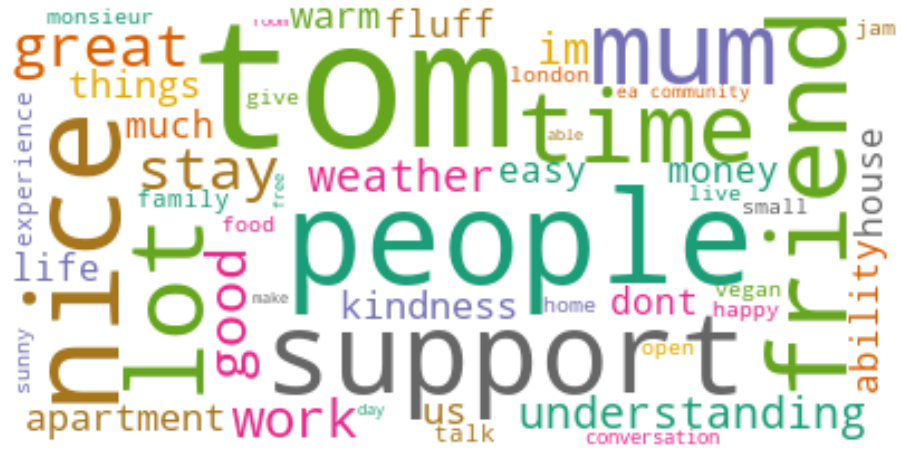

In [43]:
#plot cloud
fig = plt.figure(figsize=(16,10))
_ = plt.imshow(grateful_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Reaching a cheesy conclusion. Looks like I'm grateful for my partner, Tom, people, friend (in the plural presumably), supportm time, and "nice". My asumption is that for increased wellbeing I'll have to increase interaciton with these entities. 

As a later step we can check for correlatons between weekly average positive feelings and sentiment scores from the gratefulness colunm (with a note that it'll have positive sentiment values, as it's designed to capture positive feelings).

### Sentiment analysis

We'll plot a change of sentiment from the gratefulness column.

In [44]:
from textblob import TextBlob

#get sentiment for each week
#clean strings
df_weekly['What three things were you grateful for?'] = df_weekly['What three things were you grateful for?'].astype(str).replace('1/','').replace('2/','').replace('3/','').replace('\\','')

# c = df_weekly['What three things were you grateful for?'].apply(lambda row: TextBlob(row).sentiment.polarity)

#create columns to store subjectivity and polarity
df_weekly['sentiment_subjectivity'] = df_weekly['What three things were you grateful for?'].apply(lambda row: TextBlob(row).sentiment.subjectivity)
df_weekly['sentiment_polarity'] = df_weekly['What three things were you grateful for?'].apply(lambda row: TextBlob(row).sentiment.polarity)

In [45]:
#sort the weekly df by date
df_weekly = df_weekly.sort_values(by='Week end', ascending=False)

In [46]:
df_weekly_resampled_m = df_weekly.resample('m').mean()

In [47]:
df_weekly_resampled_m.head()

,Unnamed: 0,How many hours have you worked for money? (Toggle data),How many hours have you spent on self improvement & career development? (Toggl data),How many hours were taken by life-organizing?,How many times have you been to the gym?,How many times have you done other non-gym sports?,How many hours of sleep did you get on average?,How many hours of *deep* sleep did you get on average?,sentiment_subjectivity,sentiment_polarity
Week end,,,,,,,,,,
2019-01-31,41.333333,86260.0,46400.0,7320.0,3.666667,2.333333,29660.0,7500.0,0.752778,0.415152
2019-02-28,44.750000,62865.0,41925.0,21630.0,5.750000,0.500000,29445.0,7440.0,0.730682,-0.000758
2019-03-31,63.200000,62232.0,56400.0,16176.0,6.000000,0.600000,30456.0,8796.0,0.443333,0.225000
2019-04-30,39.750000,54750.0,53565.0,14445.0,5.000000,2.000000,29250.0,8295.0,0.350000,0.148343
2019-05-31,34.500000,64530.0,65205.0,13800.0,5.000000,1.750000,29220.0,8925.0,0.653819,0.204514


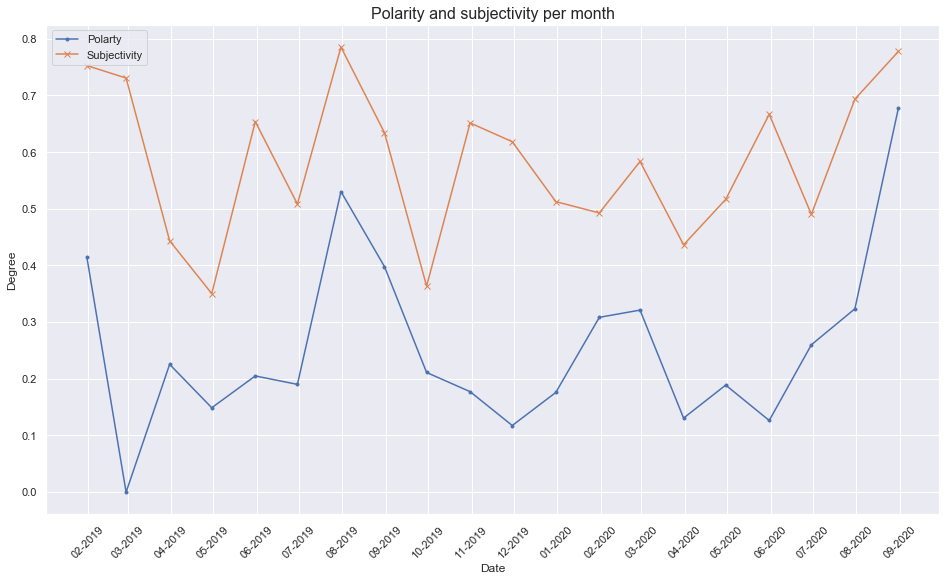

In [48]:
#plot
fig, ax = plt.subplots(figsize=(16,10))

x = df_weekly_resampled_m.index
y = df_weekly_resampled_m['sentiment_polarity']
y1 = df_weekly_resampled_m['sentiment_subjectivity']

ax.set_title("Polarity and subjectivity per month", fontsize=16)
ax.set_ylabel('Degree') 
ax.set_xlabel('Date')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
ax.tick_params(axis='x', rotation=45)


ax.plot(x, y, marker='.', label='Polarty')
ax.plot(x, y1, marker='x', label='Subjectivity')

#set legend
plt.legend()

plt.show()

**Important note:** The x axis on this graph is not correct. The fist value should land in 01-2019 not on 02-2019. There appears to be some kind of offset in ploting if data is grouped by week. In spite of many tries I didn't find a way to fix this. If anyone can help, please let me know. 

(After correcting for the above,) based on the gratefulness data the highest values on subjectivity were observed in January, July 2019 and July 2020. High values of polarity in January and July 2019. 

Potential next steps: 
* Calculate and plot sentiment for each week and get its mean value per country.
* Identify most unique words as a proxy of most unique days (defined by their daily activities).
* Named entity recognition for place names etc. 
* Sentiment analysis for each day and checking how it correlates to mood scores.  

## Sentiment analysis daily form: polarity and subjectivity of each day

We can calculate polarity and subjectivity scores for each day, based on the record of three stand out things, then calculate their average per week, and compare the average with the scores calculated from the gratefulness column.

In [49]:
#clean the text column from the daily data
df_sorted['three_things'] = df_sorted['three_things'].astype(str).replace('1/','').replace('2/','').replace('3/','').replace('\\','')

In [50]:
#create columns to store the sentiment values
df_sorted['sentiment_polarity'] = (df_sorted['three_things'].astype(str)).apply(lambda row: TextBlob(row).sentiment.polarity)
df_sorted['sentiment_subjectivity'] = (df_sorted['three_things'].astype(str)).apply(lambda row: TextBlob(row).sentiment.subjectivity)

In [51]:
print('The mean subjectivity of the daily summary is', df_sorted['sentiment_subjectivity'].mean())
print('The mean subjectivity of the daily polarity is', df_sorted['sentiment_polarity'].mean())

The mean subjectivity of the daily summary is 0.3537764318300584
The mean subjectivity of the daily polarity is 0.1308579702262186


### Sentiment and mood correlations
We can check if the weekly sentiment values form the text data are is in any way correlated with the weekly mood.

We'll be working with location data (country, city). We can handle this first.

In [52]:
df_weekly = df_weekly.rename(columns={'Which city were you in most of this week?':'city'})
df_weekly['city'].value_counts(dropna=False)

['Caen']            23
['Chiang Mai']      17
['Gap']              9
['Ubud', 'Bali']     8
['London']           7
['Kuala Lumpur']     5
['Warsaw']           4
['Paris']            3
['Penang']           2
['Lisbon']           1
['Geneva']           1
['Sabadell']         1
['Barcelona']        1
Name: city, dtype: int64

In [53]:
#one value in cities has to be standardised
df_weekly['city'] =  df_weekly['city'].replace("['Gap/ Caen']", "['Gap']")
df_weekly['city'] =  df_weekly['city'].replace("['Chiang Mai / London']", "['London']")

In [54]:
#clean the column
df_weekly['city'] = df_weekly['city'].astype(str).str.replace("[",'').str.replace("]",'').str.strip()
df_weekly['city'].value_counts(dropna=False)

'Caen'            23
'Chiang Mai'      17
'Gap'              9
'Ubud', 'Bali'     8
'London'           7
'Kuala Lumpur'     5
'Warsaw'           4
'Paris'            3
'Penang'           2
'Lisbon'           1
'Geneva'           1
'Sabadell'         1
'Barcelona'        1
Name: city, dtype: int64

In [55]:
#construct a new df with relevant columns from daily data and weekly data

#prepare the daily data
#resample df to begrouped by week and calculate mean of each numerical column
df_sorted_resampled = df_sorted.resample('W').mean()
df_sorted_resampled = df_sorted_resampled.sort_index(ascending=False)

#identify only the necessary columns
cols_for_reindex = ['Sleep Quality', 'Anxiety', 'Depression', 'Productivity', 'Self-confidence', 'Motivation', 'Creativity','sentiment_polarity', 'sentiment_subjectivity']

#select columns needed 
df_resampled_selected = df_sorted_resampled[cols_for_reindex]

#check
df_resampled_selected.head(2)

,Sleep Quality,Anxiety,Depression,Productivity,Self-confidence,Motivation,Creativity,sentiment_polarity,sentiment_subjectivity
Date,,,,,,,,,
2020-08-09,7.428571,2.000000,2.285714,5.571429,5.166667,4.500000,1.666667,0.074660,0.407058
2020-08-02,8.571429,1.857143,1.571429,5.857143,5.857143,4.857143,1.714286,0.306548,0.519048


In [56]:
#rename the columns for clarity
df_for_merge = df_resampled_selected.rename(columns={'sentiment_polarity':'sentiment_polarity_daily_avg','sentiment_subjectivity':'sentiment_subjectivity_daily_avg' })
df_weekly_for_merge = df_weekly.rename(columns={'Country':'country','sentiment_polarity':'sentiment_polarity_weekly','sentiment_subjectivity':'sentiment_subjectivity_weekly' })

#pick columns from the weekly df for merge
df_weekly_for_merge = df_weekly_for_merge[['city', 'country', 'sentiment_polarity_weekly', 'sentiment_subjectivity_weekly']]

In [57]:
#merge dfs
merged_sentiment = df_for_merge.join(df_weekly_for_merge)
print(merged_sentiment.shape)
merged_sentiment.head()

(95, 13)


,Sleep Quality,Anxiety,Depression,Productivity,Self-confidence,Motivation,Creativity,sentiment_polarity_daily_avg,sentiment_subjectivity_daily_avg,city,country,sentiment_polarity_weekly,sentiment_subjectivity_weekly
Date,,,,,,,,,,,,,
2020-08-09,7.428571,2.000000,2.285714,5.571429,5.166667,4.500000,1.666667,0.074660,0.407058,NaN,NaN,NaN,NaN
2020-08-02,8.571429,1.857143,1.571429,5.857143,5.857143,4.857143,1.714286,0.306548,0.519048,'Paris',France,0.677778,0.777778
2020-07-26,7.142857,2.571429,3.142857,3.142857,4.428571,4.000000,1.714286,0.097619,0.369048,'Gap',France,0.212500,0.481250
2020-07-19,7.285714,2.714286,2.714286,6.142857,5.714286,5.428571,2.571429,0.214286,0.411905,'Caen',France,0.650000,0.687500
2020-07-12,7.285714,2.142857,2.000000,7.428571,6.428571,6.857143,3.428571,0.078247,0.265584,'Caen',France,0.000000,1.000000


In [58]:
#check for nans
merged_sentiment.isna().sum()

Sleep Quality                        0
Anxiety                              0
Depression                           0
Productivity                         0
Self-confidence                      0
Motivation                           0
Creativity                           0
sentiment_polarity_daily_avg         0
sentiment_subjectivity_daily_avg     0
city                                20
country                             20
sentiment_polarity_weekly           20
sentiment_subjectivity_weekly       20
dtype: int64

There are 19 weeks where the city, country, and gratitude data were not collected. For the correlation analysis we can drop these rows, but later on we'll fill in the values based on my calendar.

In [59]:
me = merged_sentiment.dropna()

### Normalization
To run correlations we need to normalize the data, as they are on different scales—1-10 for mood and -1 to 1 for polarity and subjectivity. We'll make the mood data match the polarity/subjectivity scale.

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler(feature_range=(-1,1))
#pick what to transform
me_to_transform = me.iloc[:,0:7]

#scale
scaled_values = scaler.fit_transform(me_to_transform)

#reconstruct the df with scaled values
scaled_df_values = pd.DataFrame(scaled_values, columns=me_to_transform.columns, index=me_to_transform.index)

In [62]:
#join dfs
me_scaled = scaled_df_values.join(me.iloc[:,7:])

In [63]:
#calculate correlations
correl_sentiment_mood = me_scaled.corr()

In [64]:
#pairs of corrlations sorted by value
corr_pairs_sentiment = correl_sentiment_mood.unstack().sort_values(kind="quicksort")

#get negative pairs with correl stronger than -0.5
strong_negative_pairs_sentiment = corr_pairs_sentiment[corr_pairs_sentiment < -0.5]
strong_positive_pairs_sentiment = corr_pairs_sentiment[(corr_pairs_sentiment > 0.5) & (corr_pairs < 1)]

In [65]:
print("Strong negative correlations:",'\n', strong_negative_pairs_sentiment, '\n','\n', "Strong positive correlations:", '\n', strong_positive_pairs_sentiment)

Strong negative correlations: 
 Motivation       Depression        -0.605003
Depression       Motivation        -0.605003
                 Self-confidence   -0.592253
Self-confidence  Depression        -0.592253
dtype: float64 
 
 Strong positive correlations: 
 Depression       Anxiety            0.503674
Anxiety          Depression         0.503674
Motivation       Productivity       0.663868
Productivity     Motivation         0.663868
Motivation       Self-confidence    0.772035
Self-confidence  Motivation         0.772035
dtype: float64


The correlation pairs are the same as when we looked at the daily values. The one new pair is a positive correlation between motivaiton and productivity.

When data has been averaged on a weekly basis, and with 19 rows removed, the correlations became stronger. It might be because the removed rows contained data that was bringing the results down. Or perhaps the variance on a weekly basis is high, so working with the means stabilises the results? 

Sentiment values from any of the 4 clumns based on the text data didn't correlate with anything.

## Stats by city

I change locaitons frequently which can have an impact on my mood, sleep, and productivity.

We can continue working with the merged sentiment dataframe, this time supplying the country and city data for the 19 rows where it's missing.

### Handle missing values

In [66]:
merged_sentiment.isnull().sum()

Sleep Quality                        0
Anxiety                              0
Depression                           0
Productivity                         0
Self-confidence                      0
Motivation                           0
Creativity                           0
sentiment_polarity_daily_avg         0
sentiment_subjectivity_daily_avg     0
city                                20
country                             20
sentiment_polarity_weekly           20
sentiment_subjectivity_weekly       20
dtype: int64

In [67]:
merged_sentiment[merged_sentiment['country'].isna()].sort_index()

,Sleep Quality,Anxiety,Depression,Productivity,Self-confidence,Motivation,Creativity,sentiment_polarity_daily_avg,sentiment_subjectivity_daily_avg,city,country,sentiment_polarity_weekly,sentiment_subjectivity_weekly
Date,,,,,,,,,,,,,
2018-10-21,8.000000,3.333333,2.000000,5.333333,7.000000,6.166667,4.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2018-10-28,6.857143,3.000000,3.285714,6.857143,6.571429,7.142857,3.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2018-11-04,7.000000,3.428571,4.142857,6.428571,6.000000,5.571429,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2018-11-11,6.000000,3.714286,4.285714,5.000000,5.285714,5.000000,2.428571,0.000000,0.000000,NaN,NaN,NaN,NaN
2018-11-18,6.428571,2.571429,3.714286,6.714286,5.142857,5.428571,1.571429,0.000000,0.000000,NaN,NaN,NaN,NaN
2018-11-25,6.285714,2.857143,2.000000,5.571429,6.571429,6.142857,3.571429,0.000000,0.000000,NaN,NaN,NaN,NaN
2018-12-02,7.428571,3.285714,3.428571,6.142857,6.714286,5.142857,2.285714,0.000000,0.000000,NaN,NaN,NaN,NaN
2018-12-09,6.714286,4.285714,4.571429,6.714286,5.571429,5.714286,1.714286,0.000000,0.000000,NaN,NaN,NaN,NaN
2018-12-16,8.142857,2.857143,3.714286,7.000000,5.428571,4.571429,1.571429,0.000000,0.000000,NaN,NaN,NaN,NaN


I know where I was in the dates that have missing city and country values:
* 2018-10-21 - 2018-12-09: Chiang Mai, Thailand 
* then 2018-12-16 - 2019-01-06: Lisbon, Portugal
* 2019-05-05 - 2019-05-19: Chiang Mai, Thailand 
* 2019-05-26 - 2019-06-02: London, UK
* 2019-07-21: Gap, France
* 2019-08-04: Paris, France

In [68]:
#clean the city column
merged_sentiment['city'] = merged_sentiment['city'].astype(str).str.replace("'",'')
merged_sentiment

,Sleep Quality,Anxiety,Depression,Productivity,Self-confidence,Motivation,Creativity,sentiment_polarity_daily_avg,sentiment_subjectivity_daily_avg,city,country,sentiment_polarity_weekly,sentiment_subjectivity_weekly
Date,,,,,,,,,,,,,
2020-08-09,7.428571,2.000000,2.285714,5.571429,5.166667,4.500000,1.666667,0.074660,0.407058,nan,NaN,NaN,NaN
2020-08-02,8.571429,1.857143,1.571429,5.857143,5.857143,4.857143,1.714286,0.306548,0.519048,Paris,France,0.677778,0.777778
2020-07-26,7.142857,2.571429,3.142857,3.142857,4.428571,4.000000,1.714286,0.097619,0.369048,Gap,France,0.212500,0.481250
2020-07-19,7.285714,2.714286,2.714286,6.142857,5.714286,5.428571,2.571429,0.214286,0.411905,Caen,France,0.650000,0.687500
2020-07-12,7.285714,2.142857,2.000000,7.428571,6.428571,6.857143,3.428571,0.078247,0.265584,Caen,France,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-18,6.428571,2.571429,3.714286,6.714286,5.142857,5.428571,1.571429,0.000000,0.000000,nan,NaN,NaN,NaN
2018-11-11,6.000000,3.714286,4.285714,5.000000,5.285714,5.000000,2.428571,0.000000,0.000000,nan,NaN,NaN,NaN
2018-11-04,7.000000,3.428571,4.142857,6.428571,6.000000,5.571429,2.000000,0.000000,0.000000,nan,NaN,NaN,NaN


In [69]:
#set up date ranges
cm_d = pd.date_range(start='2018-10-21', end='2018-12-09', freq='W')
lis_d = pd.date_range(start='2018-12-16', end='2019-01-06', freq='W')
cm2_d = pd.date_range(start='2019-05-05', end='2019-05-19', freq='W')
lon_d = pd.date_range(start='2019-05-26', end='2019-06-02', freq='W')

In [70]:
#fill in the city, country values based on date ranges
for d in cm_d:
    merged_sentiment.loc[d, 'city'] = 'Chiang Mai'
    merged_sentiment.loc[d, 'country'] = 'Thailand'

for d in lis_d:
    merged_sentiment.loc[d, 'city'] = 'Lisbon'
    merged_sentiment.loc[d, 'country'] = 'Portugal'

for d in cm2_d:
    merged_sentiment.loc[d, 'city'] = 'Chiang Mai'
    merged_sentiment.loc[d, 'country'] = 'Thailand'
    
for d in lon_d:
    merged_sentiment.loc[d, 'city'] = 'London'
    merged_sentiment.loc[d, 'country'] = 'UK'

merged_sentiment.loc['2019-07-21', 'city'] = 'Gap'
merged_sentiment.loc['2019-07-21', 'country'] = 'France'

merged_sentiment.loc['2019-08-04', 'city'] = 'Paris'
merged_sentiment.loc['2019-08-04', 'country'] = 'France'

In [71]:
#check for nulls
print(merged_sentiment.city.isna().sum())

merged_sentiment.city.value_counts()

0


Chiang Mai      25
Caen            22
Gap              9
Ubud, Bali       8
London           7
Kuala Lumpur     5
Lisbon           5
Paris            4
Warsaw           4
Penang           2
Barcelona        1
Geneva           1
nan              1
Sabadell         1
Name: city, dtype: int64

### Get min and max mood values by city

In [72]:
#group data by city and calculate mean
grouped_by_city = merged_sentiment.groupby('city').mean()
grouped_by_country = merged_sentiment.groupby('country').mean()

In [73]:
#drop nans 
grouped_by_city.dropna(inplace=True)
grouped_by_country.dropna(inplace=True)

grouped_by_city.head(2)

,Sleep Quality,Anxiety,Depression,Productivity,Self-confidence,Motivation,Creativity,sentiment_polarity_daily_avg,sentiment_subjectivity_daily_avg,sentiment_polarity_weekly,sentiment_subjectivity_weekly
city,,,,,,,,,,,
Barcelona,7.285714,4.714286,4.142857,3.714286,4.428571,4.285714,2.500000,-0.053968,0.576587,0.087500,0.300000
Caen,7.817100,2.496753,3.658009,5.775974,5.042208,5.215368,2.562771,0.165641,0.416635,0.215964,0.572901


In [74]:
#print max values of each parameter by city.
cols = grouped_by_city.columns

for c in cols:
    max_val = grouped_by_city[c].sort_values(ascending=False).head(1)
    print('The maximum levels of ' + str.lower(c), ' I had in ', max_val.index[0], ". It was ", round(max_val[0],2),'.')

The maximum levels of sleep quality  I had in  Sabadell . It was  8.57 .
The maximum levels of anxiety  I had in  Barcelona . It was  4.71 .
The maximum levels of depression  I had in  Kuala Lumpur . It was  4.8 .
The maximum levels of productivity  I had in  Geneva . It was  6.57 .
The maximum levels of self-confidence  I had in  Chiang Mai . It was  6.17 .
The maximum levels of motivation  I had in  Sabadell . It was  6.86 .
The maximum levels of creativity  I had in  Sabadell . It was  2.86 .
The maximum levels of sentiment_polarity_daily_avg  I had in  Geneva . It was  0.3 .
The maximum levels of sentiment_subjectivity_daily_avg  I had in  Barcelona . It was  0.58 .
The maximum levels of sentiment_polarity_weekly  I had in  Paris . It was  0.48 .
The maximum levels of sentiment_subjectivity_weekly  I had in  London . It was  0.79 .


In [75]:
#print min values of each parameter by city.
cols = grouped_by_city.columns

for c in cols:
    min_val = grouped_by_city[c].sort_values(ascending=False).tail(1)
    print('The minimum levels of ' + str.lower(c), ' I had in ', min_val.index[0], ". It was ", round(min_val[0],2),'.')

The minimum levels of sleep quality  I had in  Penang . It was  6.57 .
The minimum levels of anxiety  I had in  Geneva . It was  1.57 .
The minimum levels of depression  I had in  Geneva . It was  2.43 .
The minimum levels of productivity  I had in  Barcelona . It was  3.71 .
The minimum levels of self-confidence  I had in  Barcelona . It was  4.43 .
The minimum levels of motivation  I had in  Barcelona . It was  4.29 .
The minimum levels of creativity  I had in  Penang . It was  1.71 .
The minimum levels of sentiment_polarity_daily_avg  I had in  Barcelona . It was  -0.05 .
The minimum levels of sentiment_subjectivity_daily_avg  I had in  Lisbon . It was  0.18 .
The minimum levels of sentiment_polarity_weekly  I had in  Barcelona . It was  0.09 .
The minimum levels of sentiment_subjectivity_weekly  I had in  Barcelona . It was  0.3 .


Many of the top values occured in locations where I spent 1 week or less. 

This typically meant the reason for being in a location was a special event, or otherwise it was simply not a place where I had a long(ish) term life arrangement. We can eliminate these cities as outliers, in which I didn't really 'live'. As a result we'll identify long-term locations that were the most beneficial for me mood-wise.

In [76]:
city_value_counts = merged_sentiment['city'].value_counts()
city_value_counts

Chiang Mai      25
Caen            22
Gap              9
Ubud, Bali       8
London           7
Kuala Lumpur     5
Lisbon           5
Paris            4
Warsaw           4
Penang           2
Barcelona        1
Geneva           1
nan              1
Sabadell         1
Name: city, dtype: int64

In [77]:
#remove cities that appeared once 
long_city_stays = merged_sentiment[merged_sentiment['city'].map(merged_sentiment['city'].value_counts()) > 1]

In [78]:
grouped_by_long_stay_city = long_city_stays.groupby('city').mean()

In [79]:
#print max values of each parameter by city.
cols = grouped_by_long_stay_city.columns

for c in cols:
    max_val = grouped_by_long_stay_city[c].sort_values(ascending=False).head(1)
    print('The maximum levels of ' + str.lower(c), ' I had in ', max_val.index[0], ". It was ", round(max_val[0],2),'.')

The maximum levels of sleep quality  I had in  Warsaw . It was  8.43 .
The maximum levels of anxiety  I had in  Kuala Lumpur . It was  3.9 .
The maximum levels of depression  I had in  Kuala Lumpur . It was  4.8 .
The maximum levels of productivity  I had in  Chiang Mai . It was  6.32 .
The maximum levels of self-confidence  I had in  Chiang Mai . It was  6.17 .
The maximum levels of motivation  I had in  Chiang Mai . It was  6.05 .
The maximum levels of creativity  I had in  Lisbon . It was  2.66 .
The maximum levels of sentiment_polarity_daily_avg  I had in  Paris . It was  0.22 .
The maximum levels of sentiment_subjectivity_daily_avg  I had in  Penang . It was  0.49 .
The maximum levels of sentiment_polarity_weekly  I had in  Paris . It was  0.48 .
The maximum levels of sentiment_subjectivity_weekly  I had in  London . It was  0.79 .


Mood data congruent with the reports from the remembering self in all cases except for Creativity values. 

In [80]:
#print min values of each parameter by city
for c in cols:
    min_val = grouped_by_long_stay_city[c].sort_values(ascending=False).tail(1)
    print('The minimum levels of ' + str.lower(c), ' I had in ', min_val.index[0], ". It was ", round(min_val[0],2),'.')

The minimum levels of sleep quality  I had in  Penang . It was  6.57 .
The minimum levels of anxiety  I had in  Paris . It was  2.43 .
The minimum levels of depression  I had in  Paris . It was  2.61 .
The minimum levels of productivity  I had in  Gap . It was  5.37 .
The minimum levels of self-confidence  I had in  Kuala Lumpur . It was  4.54 .
The minimum levels of motivation  I had in  Penang . It was  4.55 .
The minimum levels of creativity  I had in  Penang . It was  1.71 .
The minimum levels of sentiment_polarity_daily_avg  I had in  Kuala Lumpur . It was  0.04 .
The minimum levels of sentiment_subjectivity_daily_avg  I had in  Lisbon . It was  0.18 .
The minimum levels of sentiment_polarity_weekly  I had in  Ubud, Bali . It was  0.1 .
The minimum levels of sentiment_subjectivity_weekly  I had in  Warsaw . It was  0.38 .


Mood data congruent with the reports from the remembering self in all cases except for productivity values being low in Paris. I don't remember it being this way.

Interesting to notice that min productivity, min depression as well as max creativity were observed in the same city, Paris. And this is not how I remember this stay—I wouldn't say it was below avg productive, or in any way more creative.

**Further steps:**
* Group the data by country
* Group the data by weekday, perhaps there are significant differences depending on a weekday (or rather if the day was off or not, since I often work on weekends and take selected weekdays off).

## Where did I work most?
I tracked time spent on work, self-imporvement, and life organising. We can calculate how much on avergae was spend on each of these activities in each locaiton.

### Clean the data

In [81]:
df_weekly.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [82]:
#clean city columsn
df_weekly['city'] = df_weekly['city'].str.replace("'","")

#rename relevant columns
df_weekly = df_weekly.rename(columns={'Country':'country','How many hours have you worked for money? (Toggle data)':'work_hrs','How many hours have you spent on self improvement & career development? (Toggl data)':'self_dev_hrs','How many hours were taken by life-organizing?':'life_hrs', 'How many hours of sleep did you get on average?':'avg_sleep_hrs','How many hours of *deep* sleep did you get on average?':'avg_deep_sleep_hrs' })

In [83]:
#select relevant columns only
df_weekly_hrs = df_weekly[['city','country','work_hrs','self_dev_hrs','life_hrs','avg_sleep_hrs','avg_deep_sleep_hrs']]

#check for nans
df_weekly_hrs.isna().sum()

city                  0
country               0
work_hrs              0
self_dev_hrs          0
life_hrs              0
avg_sleep_hrs         0
avg_deep_sleep_hrs    0
dtype: int64

In [84]:
#fill in one missing value with a mean
df_weekly_hrs=df_weekly_hrs.fillna(df_weekly_hrs.mean())
df_weekly_hrs.isna().sum()

city                  0
country               0
work_hrs              0
self_dev_hrs          0
life_hrs              0
avg_sleep_hrs         0
avg_deep_sleep_hrs    0
dtype: int64

In [85]:
df_weekly_hrs.dtypes

city                  object
country               object
work_hrs               int64
self_dev_hrs           int64
life_hrs               int64
avg_sleep_hrs          int64
avg_deep_sleep_hrs     int64
dtype: object

In [86]:
df_weekly_hrs['work_hrs'] = df_weekly_hrs['work_hrs'].astype(int)
df_weekly_hrs['work_hrs']

Week end
2020-08-02     50400
2020-07-26     35700
2020-07-19     44820
2020-07-12     77400
2020-07-05     68400
               ...  
2019-02-10     47760
2019-02-03     76500
2019-01-27     86640
2019-01-20     59640
2019-01-13    112500
Name: work_hrs, Length: 82, dtype: int64

The values appear to be in seconds. We'll later convert it into hours.

### Get max values

In [87]:
#group by city and get the mean value
weekly_hrs_by_city = df_weekly_hrs.groupby('city').mean()
cols = weekly_hrs_by_city.columns

for c in cols:
    sorted_hrs = weekly_hrs_by_city[c].sort_values(ascending=False)
    top_value = sorted_hrs.head(1)
    bottom_value = sorted_hrs.tail(1)
    #turn into an integer & convert to hrs
    top_integer = int(top_value)/ 3600
    bottom_integer = int(bottom_value) / 3600
    
    print('The highest number of averge ', c, ' per week was', round(top_integer,2),' observed in', top_value.index[0], 
          'and the smallest', round(bottom_integer,2), 'in', bottom_value.index[0],'.')

The highest number of averge  work_hrs  per week was 31.25  observed in Lisbon and the smallest 5.75 in Barcelona .
The highest number of averge  self_dev_hrs  per week was 19.22  observed in Warsaw and the smallest 4.27 in Barcelona .
The highest number of averge  life_hrs  per week was 9.03  observed in Geneva and the smallest 2.73 in Lisbon .
The highest number of averge  avg_sleep_hrs  per week was 8.28  observed in Lisbon and the smallest 6.96 in Penang .
The highest number of averge  avg_deep_sleep_hrs  per week was 2.57  observed in Warsaw and the smallest 1.28 in Kuala Lumpur .


Again, the cities where I stayed for less than a week could be removed from the analysis. The assumption being: it was a holiday or something out of ordinary, without a regular work-learn-play schdule.

In [105]:
#drop rows
weekly_hrs_by_city_reduced = weekly_hrs_by_city.drop(labels=['Geneva', 'Barcelona', 'Sabadell'])

cols = weekly_hrs_by_city_reduced.columns

for c in cols:
    sorted_hrs = weekly_hrs_by_city_reduced[c].sort_values(ascending=False)
    top_value = sorted_hrs.head(1)
    bottom_value = sorted_hrs.tail(1)
    #turn into an integer & convert to hrs
    top_integer = int(top_value)/ 3600
    bottom_integer = int(bottom_value) / 3600
    
    print('The highest number of averge ', c, ' per week was', round(top_integer,2),' observed in', top_value.index[0], 
          'and the smallest', round(bottom_integer,2), 'in', bottom_value.index[0],'.')

The highest number of averge  work_hrs  per week was 31.25  observed in Lisbon and the smallest 9.18 in Warsaw .
The highest number of averge  self_dev_hrs  per week was 19.22  observed in Warsaw and the smallest 9.77 in Penang .
The highest number of averge  life_hrs  per week was 6.43  observed in Warsaw and the smallest 2.73 in Lisbon .
The highest number of averge  avg_sleep_hrs  per week was 8.28  observed in Lisbon and the smallest 6.96 in Penang .
The highest number of averge  avg_deep_sleep_hrs  per week was 2.57  observed in Warsaw and the smallest 1.28 in Kuala Lumpur .


After removing three low-length stay cities, the most work was done in Lisbon, and the least in Warsaw. At the same time the most self development was done in Warsaw, which presumably took the time that has been devoted to work before.

Lisbon had the smalles value of life hours (devoted to various life organising activities). Looks like I was really doubling down on work.

The worst sleep values were in KL and Penang, congruent with the expeince of the remembering self.

**Further steps:**
* Show stats per country
* Show stats per month (perhaps there are seasonal differnces, although the dataset doesn't have repeated measurements form all seasons)


#### BONUS SECTION: Display as hours & minutes?
We could work with datetime objects to avoid awkward decimals for hours, but there are some challeneges there if the values exceed 24hrs. 

In [89]:
for c in cols:
    top_value= weekly_hrs_by_city_reduced[c].sort_values(ascending=False).head(1)
    #86400 is the number of seconds in 24h
    top_strf = pd.to_timedelta(top_value[0], unit='s')
    print('The top value of', c, ', with a mean of', top_strf, 'hours, was observed in', top_value.index[0], '.')

The top value of work_hrs , with a mean of 1 days 07:15:00 hours, was observed in Lisbon .
The top value of self_dev_hrs , with a mean of 0 days 19:13:15 hours, was observed in Warsaw .
The top value of life_hrs , with a mean of 0 days 06:26:00 hours, was observed in Warsaw .
The top value of avg_sleep_hrs , with a mean of 0 days 08:17:00 hours, was observed in Lisbon .
The top value of avg_deep_sleep_hrs , with a mean of 0 days 02:34:00 hours, was observed in Warsaw .


I was really trying hard to convert these values into hrs:min. 

Hoever handling the val >=24 was too hard. Lisbon (see table below) should display 31:15, but shows 31 - 24 value for hours. Other solutions show day values (as zero) in all other cells. 

Keeping these attempts for posterity though.

In [90]:
weekly_hrs_floats = weekly_hrs_by_city.apply(lambda x: round(x/3600,2))

In [91]:
def convert(number):
    hour = ('%.2f' % number).split(sep='.')[0]
    minute = ('%.2f' % number).split(sep='.')[1]
    #convert from decimals to minutes 
    minute = int(int(minute)*60/100)
    if int(hour) < 24:
        return pd.to_datetime(str(hour)+":"+str(minute), format='%H:%M')
    if int(hour) >= 24:
        day = int(int(hour)/24)
        hour = int(hour) - 24
        return pd.to_datetime(str(day)+":"+str(hour)+":"+str(minute), format='%d:%H:%M')

In [92]:
hour_min = weekly_hrs_floats.applymap(convert)

In [93]:
for i in hour_min:
    hour_min[i] = hour_min[i].dt.time 

In [94]:
hour_min

,work_hrs,self_dev_hrs,life_hrs,avg_sleep_hrs,avg_deep_sleep_hrs
city,,,,,
Barcelona,05:45:00,04:16:00,05:28:00,08:15:00,02:21:00
Caen,19:26:00,16:04:00,03:16:00,07:16:00,02:00:00
Chiang Mai,17:26:00,14:53:00,04:26:00,08:16:00,02:18:00
Gap,16:22:00,16:00:00,03:13:00,07:55:00,02:16:00
Geneva,11:49:00,17:01:00,09:01:00,07:46:00,02:19:00
Kuala Lumpur,16:57:00,11:32:00,03:27:00,07:03:00,01:16:00
Lisbon,07:15:00,17:00:00,02:43:00,08:16:00,01:49:00
London,14:33:00,14:59:00,03:54:00,07:55:00,02:31:00
Paris,12:43:00,13:58:00,05:30:00,08:04:00,02:10:00


## Plot activity data

In [95]:
#for plotting we can use floats
weekly_hrs_floats = weekly_hrs_by_city.apply(lambda x: round(x/3600,2))

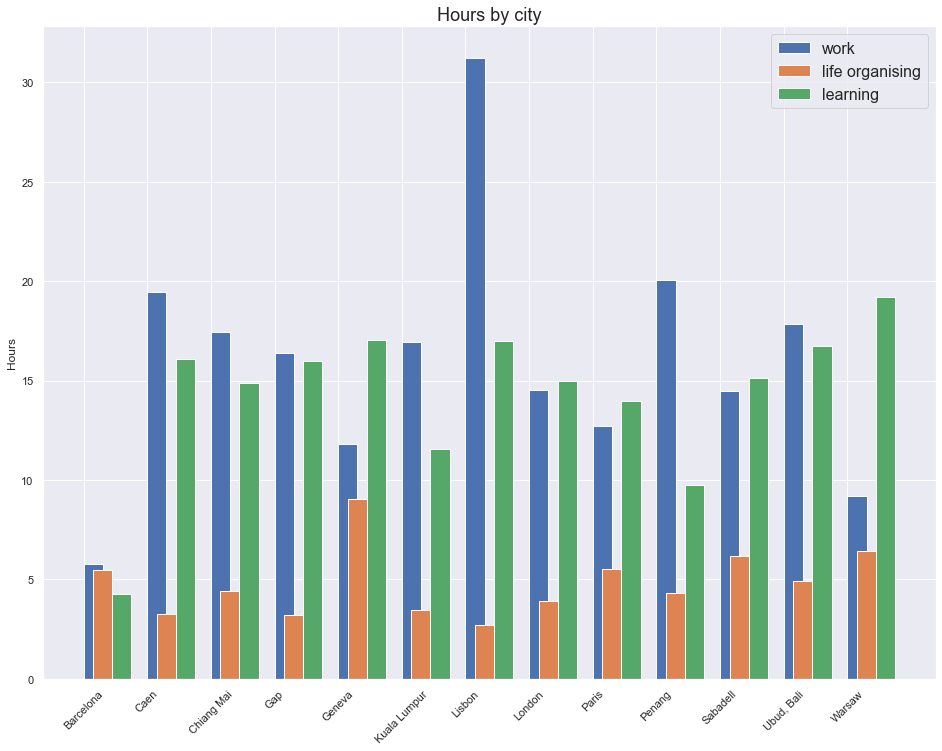

In [96]:
fig, ax = plt.subplots(figsize=(16,12))

labels = weekly_hrs_floats.index

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

val_1 = ax.bar(x + width/2, weekly_hrs_floats['work_hrs'], width, label='work')
val_2 = ax.bar(x + width, weekly_hrs_floats['life_hrs'], width, label='life organising')
val_3 = ax.bar(x + width*2, weekly_hrs_floats['self_dev_hrs'], width, label='learning')


ax.set_ylabel('Hours')
ax.set_title('Hours by city',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(prop={'size':16})

plt.show()

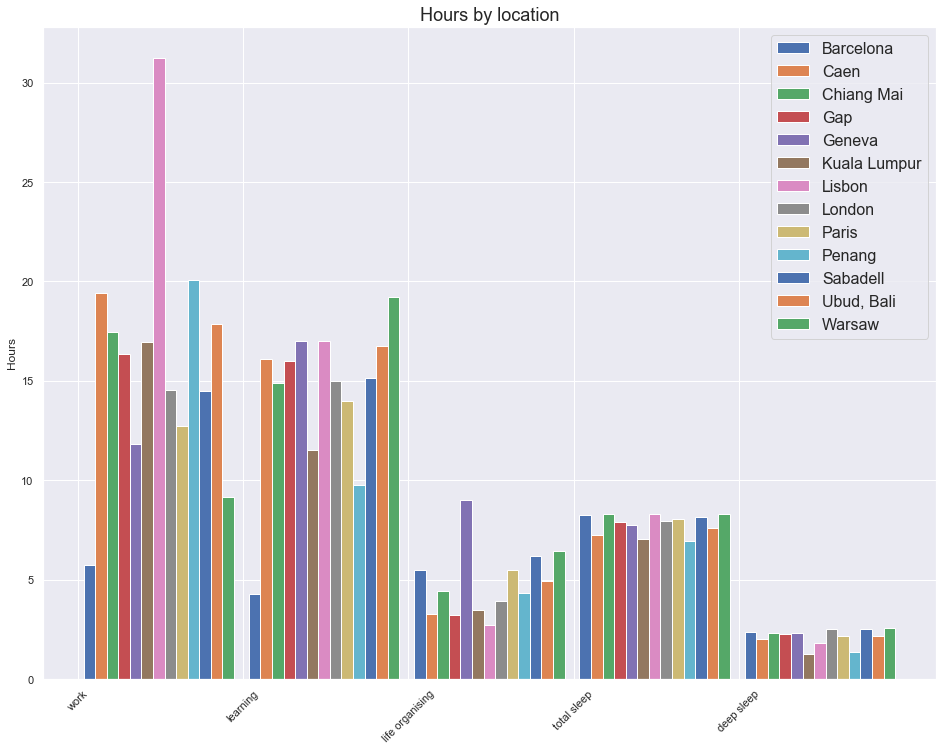

In [97]:
fig, ax = plt.subplots(figsize=(16,12))

labels = ['work','learning','life organising', 'total sleep', 'deep sleep']

x = np.arange(len(labels))  # the label locations
width = 0.07  # the width of the bars

for i in range(0,len(weekly_hrs_floats.index)):
    city=weekly_hrs_floats.index[i]
    val_1 = ax.bar(x + width*(i+1), weekly_hrs_floats.loc[city], width, label=city)

ax.set_ylabel('Hours')
ax.set_title('Hours by location',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(prop={'size':16})

plt.show()

This graph is much less informative.

## Sleep stats

We can visualise the sleep data, primarily the fun of it, because we already know the top city-value pairs from above.

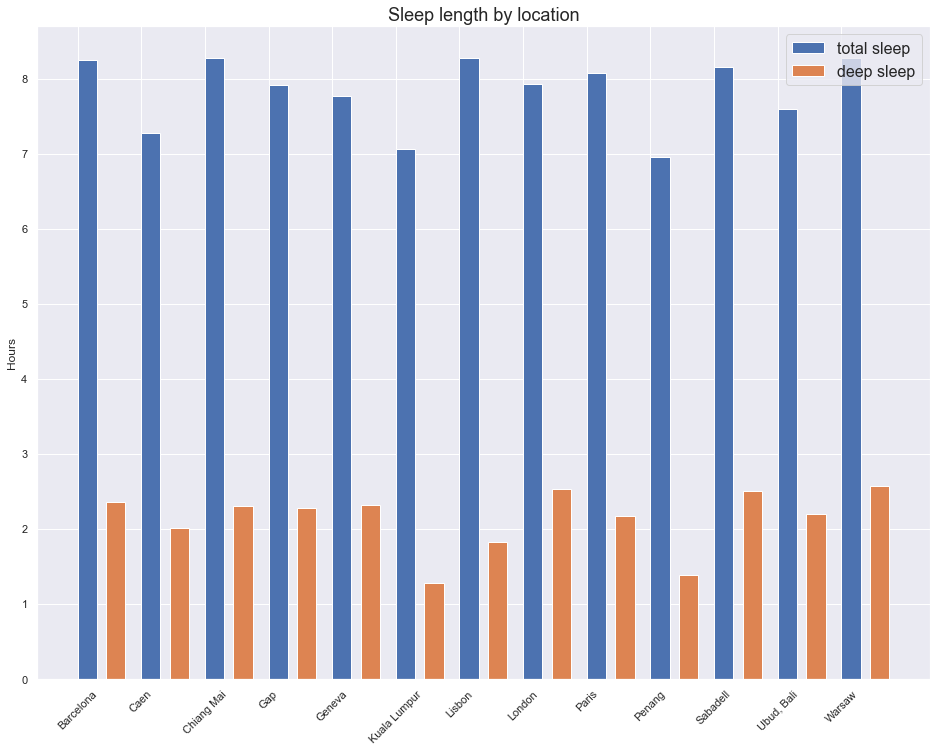

In [98]:
fig, ax = plt.subplots(figsize=(16,12))

labels = weekly_hrs_floats.index

x = np.arange(len(labels))  
width = 0.3  

val_1 = ax.bar(x + width/2, weekly_hrs_floats['avg_sleep_hrs'], width, label='total sleep')
val_2 = ax.bar(x + width*2, weekly_hrs_floats['avg_deep_sleep_hrs'], width, label='deep sleep')

ax.set_ylabel('Hours')
ax.set_title('Sleep length by location',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(prop={'size':16})

plt.show()

## Group by country



In [99]:
grouped_by_country = df_weekly_hrs.groupby('country').mean()

#turn into floats
grouped_by_country_floats = grouped_by_country.apply(lambda x: round(x/3600,2))

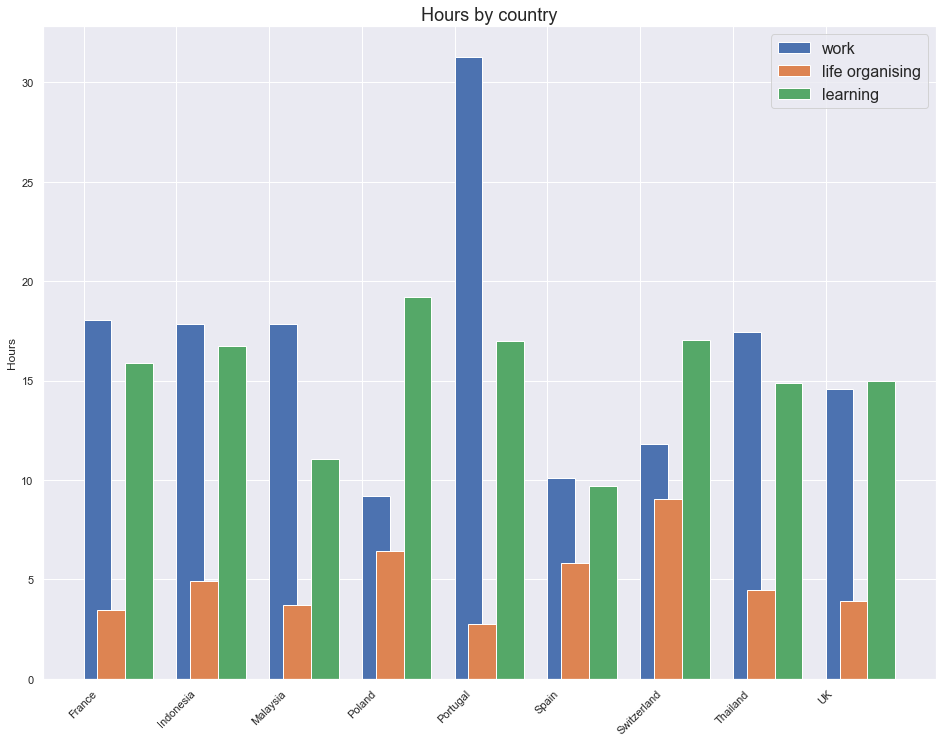

In [100]:
fig, ax = plt.subplots(figsize=(16,12))

labels = grouped_by_country_floats.index

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

val_1 = ax.bar(x + width/2, grouped_by_country_floats['work_hrs'], width, label='work')
val_2 = ax.bar(x + width, grouped_by_country_floats['life_hrs'], width, label='life organising')
val_3 = ax.bar(x + width*2, grouped_by_country_floats['self_dev_hrs'], width, label='learning')


ax.set_ylabel('Hours')
ax.set_title('Hours by country',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(prop={'size':16})

plt.show()

In [101]:
#get highest and lowest country values
cols = grouped_by_country.columns

for c in cols:
    sorted_hrs = grouped_by_country[c].sort_values(ascending=False)
    top_value = sorted_hrs.head(1)
    bottom_value = sorted_hrs.tail(1)
    #turn into an integer & convert to hrs
    top_integer = int(top_value)/ 3600
    bottom_integer = int(bottom_value) / 3600
    
    print('The highest number of averge ', c, ' per week was', round(top_integer,2),' observed in', top_value.index[0], 
          'and the smallest', round(bottom_integer,2), 'in', bottom_value.index[0],'.')

The highest number of averge  work_hrs  per week was 31.25  observed in Portugal and the smallest 9.18 in Poland .
The highest number of averge  self_dev_hrs  per week was 19.22  observed in Poland and the smallest 9.69 in Spain .
The highest number of averge  life_hrs  per week was 9.03  observed in Switzerland and the smallest 2.73 in Portugal .
The highest number of averge  avg_sleep_hrs  per week was 8.28  observed in Portugal and the smallest 7.03 in Malaysia .
The highest number of averge  avg_deep_sleep_hrs  per week was 2.57  observed in Poland and the smallest 1.31 in Malaysia .


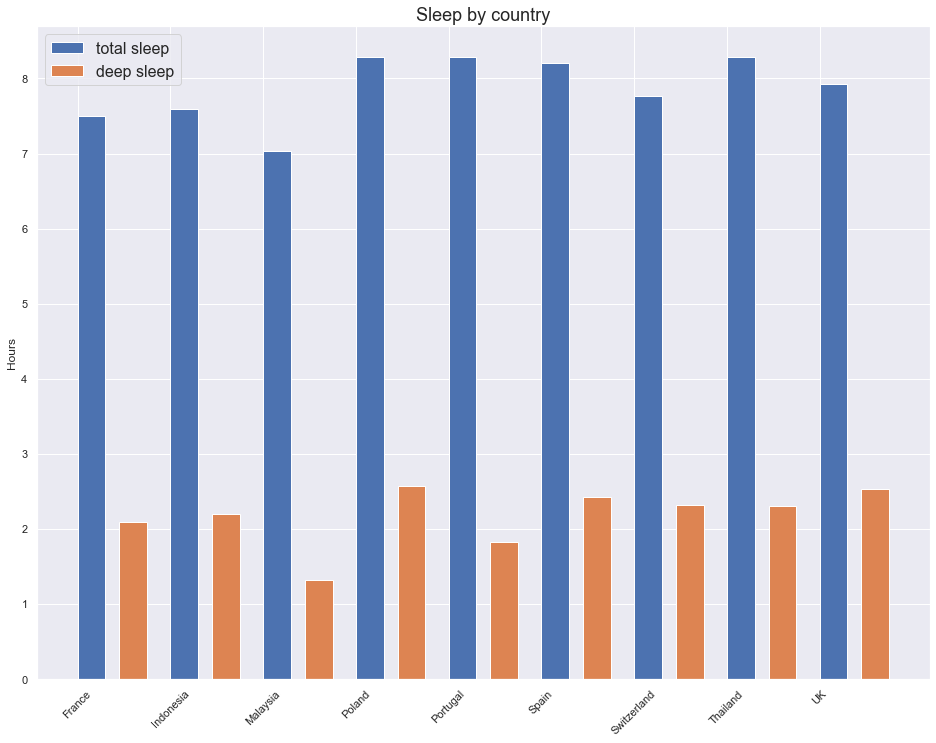

In [102]:
#plot sleep stats

fig, ax = plt.subplots(figsize=(16,12))

labels = grouped_by_country_floats.index

x = np.arange(len(labels))  
width = 0.3  

val_1 = ax.bar(x + width/2, grouped_by_country_floats['avg_sleep_hrs'], width, label='total sleep')
val_2 = ax.bar(x + width*2, grouped_by_country_floats['avg_deep_sleep_hrs'], width, label='deep sleep')

ax.set_ylabel('Hours')
ax.set_title('Sleep by country',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(prop={'size':16})

plt.show()

## Conclusions

We observes some obvious mood correlations (e.g. negative correlation between self-confidence and depression). What was surprising is that self reported sleep qualty score didn't produce significant levels of correlation.

Text data showed what I'm mostly grateful for and what activites mark my typical days. When looking at cities—obviusl the results aren't so much abotu the city itself, but if anything about the quality of apartment, work set up, scial interaction, weather, etc. during my stay. It'd helpful then to review in more detail how exactly life looked like in the most pormissing locations, e.g. Warsaw, Chiang-Mai, and Caen.

### Next steps
Besides the suggestions listed througout this notebook. There are many more analyses that can be perfomed on this data. Some ideas:
* Identify most common URLs from which I save the best weekly reading (probably waitbutwhy, LW, or PG's blog)
* Do word freqnecy analysis on quotes I want to remember and lessons learned in the week to look for most frequent keywords
* Correlations between sleep quality and sleep aids taken (would require some heavy worrk on standardizing that meds column)
* Integrate sleep stats from the Oura ring (there is an API) for more fine grained sleep data graphs and more accurate correlations between sleep, activity and mood
* After a few more years I'd attempt a season-based mood prediction. Thoughts to self:
- Could probably do something based on weekdays already now. 
- How about using multiple snapshots on monthly data? Not sure if the current df would be enough/produce reliable results with multiple snapshots? How many snapshots are needed?